# Generador de (pseudo) números aleatorios mediante el algoritmo de congruencia lineal (GCL) y transformación Box-Muller





In [9]:

import numpy as np
from numpy import sqrt, log, sin, cos, pi

import seaborn as sns
import matplotlib.pyplot as plt

## 1. Generador Congruencia Lineal

$X_{n+1} = (aX_n + b)\bmod c$

donde $ a $ (el multiplicador),  $ b $  (el incremento) y $ c $  (módulo) son parámetros enteros del generador fijados de antemano.

In [10]:
def genera_aleatorios(a =  1, b = 7, 
                      m = 10):
  ''' Genera números aleatorios mediante el algoritmo de congruencia lineal
  a, es el multiplicador
  b, es el incremento 
  c, es el módulo
  '''
  genera_aleatorios.X = (a*genera_aleatorios.X + b) % m
  return genera_aleatorios.X 

###¿Cuántos números se generan antes de que se repita la secuencia?
###¿Cada numero de la serie generada es independiente de los otros?
¿qué relación tiene con el valor de los parámetros a, b y m?

In [11]:
genera_aleatorios.X = 4

n = 20
datos = [genera_aleatorios() for i in range(n)]
datos

[1, 8, 5, 2, 9, 6, 3, 0, 7, 4, 1, 8, 5, 2, 9, 6, 3, 0, 7, 4]

No es trivial la elección de parámetros.

Se deben asegurar ciclos muy largos y que no existan autocorrelación en los datos.

La longitud de un ciclo tiene como tope m, pero puede ser menor en base a la eleccion de a y b

In [12]:
def genera_aleatorios(a =  1103515245, b = 12345, 
                      m = (2**32)):
  ''' Genera números aleatorios mediante el algoritmo de congruencia lineal
  a, es el multiplicador
  b, es el incremento 
  c, es el módulo

  por defecto a, b y c se han elegido de manera que satisfacen el Teorema
  Hull-Dobell, según el cual este algoritmo tendra un periodo completo, 
  igual a m, para cualquier semillas elegida, si y solo si:
  b y m son primos relativos
  a-1 es divisible por todos los factores primos de m
  a-1 es multiplo de 4 si m es multiplo de 4
  '''
  genera_aleatorios.X = (a*genera_aleatorios.X + b) % m

  return genera_aleatorios.X / m
   


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


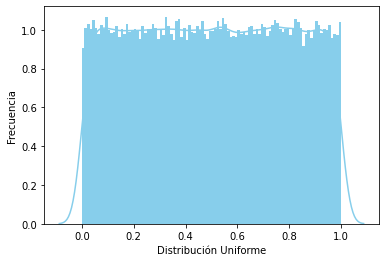

In [13]:
#genera_aleatorios.X = .5  #cualquier número entero mayor que 0
genera_aleatorios.X = 8

n = 100000
var = [genera_aleatorios() for i in range(n)]

gr1=sns.distplot(var, bins=100, kde=True, color='skyblue', 
                 hist_kws={'linewidth':15,'alpha':1})
gr1.set(xlabel='Distribución Uniforme', ylabel='Frecuencia')
plt.show()

## 2. Transformación Box - Muller


>>>$x = r\cos(\theta) =  \sqrt{-2ln(x_1)}\cos(2\pi x_2)$


>>>$y =  r\sin(\theta) =\sqrt{-2ln(x_1)}\sin(2\pi x_2)$

[Diagrama ilustrativo de la relación entre las cordenadas plares y las cartesianas de Wikipedia](https://es.wikipedia.org/wiki/Coordenadas_polares#/media/Archivo:Polar_to_cartesian.svg)

In [14]:
def transformacion_gaussiana(u1,u2):
  ''' función para transformar dos variables independientes
   con valores entre 0 y 1 con distribución uniforme, a dos variables 
   independientes con distribución gaussiana, utilizando la transformación
   Box-Muller'''

  r = sqrt(-2*log(u1))
  theta = 2*pi*u2
  
  x = r * cos(theta)
  y = r * sin(theta)

  return x, y

La media de x es -0.01, y la desviación estándar es: 0.99
La media de y es -0.00, y la desviación estándar es: 0.97


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


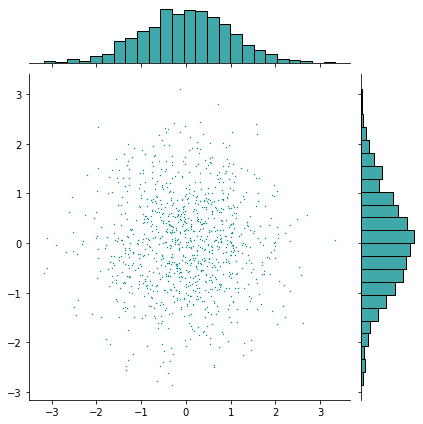

In [16]:
n = 1000

var_u1 = np.array([genera_aleatorios() for i in range(n)])
var_u2 = np.array([genera_aleatorios() for i in range(n)])


x, y, = transformacion_gaussiana(var_u1, var_u2)

print('La media de x es {0:.2f},'\
      ' y la desviación estándar es: {1:.2f}'.format(x.mean(), x.std()))
print('La media de y es {0:.2f},'\
      ' y la desviación estándar es: {1:.2f}'.format(y.mean(), y.std()))

sns.jointplot(x, y, kind = 'scatter', color = 'darkcyan', s = 2 )
plt.show()